# Scientific Python in a Nutshell

## Adam Hughes (Contact info at end of document)

### Objective

We give a quick tour of scientific python libraries (numpy, pandas, scikit-image/learn).  This formed the basis of a runthrough for a 50 min presentation at GWU Physics Department (Nov 2014)

### Environment Setup

Configure notebook style (see NBCONFIG.ipynb), add imports and paths.  The **%run** magic used below <font color='red'>**requires IPython 2.0 or higher.**</font>  

**Note**: this will change your default matplotlib settings.  If you have `pyuvvis` installed (you don't), then it will also change the style/color of the notebook.  That's why my notebook has a tan background and different fonts than yours.

In [1]:
%run NBCONFIG.ipynb

Populating the interactive namespace from numpy and matplotlib
['dti', 'd', 'h', 'm', 'us', 's', 'ms', 'intvl', 'ns']


### Python is Easy, but slow at math

Python provides a very minimal, readable syntax, which is a big reason why it's so popular for newcomers.  The learning curve gets you up and running fast, but the language is just as deep and Java.  The drawback is that python is relatively slow when it comes to numerics, due to its high-level abstractions like at the `list`.  Let's see how long it takes to multiply item-by-item two lists of numbers.  We'll do the "dot product" or the "vector product" meaning we only mulitply when i and j are the same.

In [2]:
x = range(0, 100)
y = range(0, 100)

In [3]:
%%timeit
z = []  #Empty container

for i in range(0,100):
    z.append(x[i]*y[i])

10000 loops, best of 3: 28.6 µs per loop


### Numpy is Easy and Fast

In [4]:
x, y = np.array(x), np.array(y)

In [5]:
%%timeit
z = x*y

The slowest run took 12.82 times longer than the fastest. This could mean that an intermediate result is being cached 
1000000 loops, best of 3: 1.86 µs per loop


**In most operations, numpy is much faster actually!**  Of course, I don't know the first thing about benchmarking.  [Here's a much better comparison.](https://modelingguru.nasa.gov/docs/DOC-1762)

### IPython notebooks display is very rich

Marvel the IPython Notebook [rich display system overview](http://nbviewer.ipython.org/github/ipython/ipython/blob/1.x/examples/notebooks/Part%205%20-%20Rich%20Display%20System.ipynb).

In [6]:
from IPython.display import YouTubeVideo
# a talk about IPython at Sage Days at U. Washington, Seattle.
# Video credit: William Stein.
YouTubeVideo('1j_HxD4iLn8')

### Rich Display and Fast Numerics (Ipython, Numpy) are the heart of scientific python

In [7]:
from IPython.display import Image
Image(url='http://luispedro.org/files/talks/2013/EuBIAS/figures/sciwheel.png', 
        width=800,
        height=1000)
# IMAGE CREDIT TO AUTHOR AT URL

**Oh, IPython is also a shell!**  No big deal... 

In [8]:
pwd

u'/media/backup/Dropbox/Writeups_Notes_and_Applications/PRESENTATION_2014_GLENIPYTHON'

In [9]:
ls

images/         presentation.ipynb  secretdata.pyc
maxentropy.pdf  README.rst          _TEMPLATE.ipynb
NBCONFIG.ipynb  secretdata.py       Untitled.ipynb


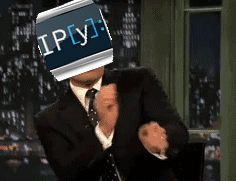

In [10]:
Image(filename='images/ipywin.png')

### Matplotlib for plotting

Matplotlib is the de-facto plotting library in python; it's **built for numpy arrays**.

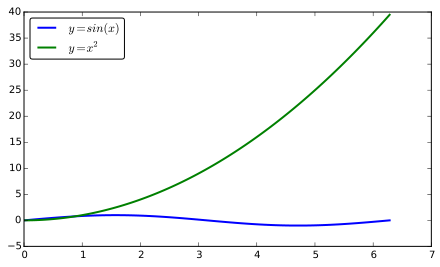

In [11]:
x = np.linspace(0,2*np.pi,100)
y = np.sin(x)
plt.plot(x,np.sin(x), 
         label='$y=sin(x)$')
plt.plot(x, x**2, 
         label='$y=x^2$')
plt.legend(loc='best');

#### 2D Plots

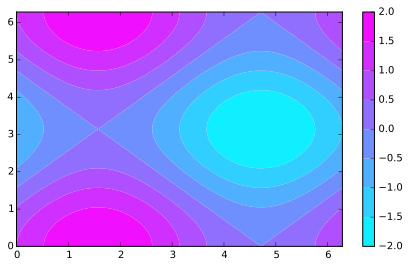

In [12]:
xx, yy = np.meshgrid(x,x)
zz = np.sin(xx) + np.cos(yy)
plt.contourf(xx, yy, zz, cmap='cool')
plt.colorbar();

#### 3d Plots

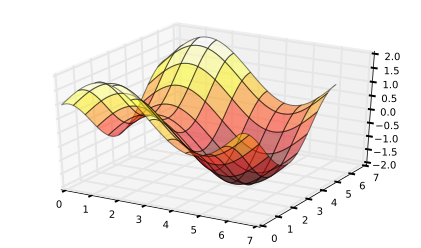

In [13]:
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(xx, yy, zz, cmap='hot', alpha=0.5);

Check out the [3dplot tutorial](http://matplotlib.org/mpl_toolkits/mplot3d/tutorial.html)

### Scipy: A collection of Routines 

While "SciPy" refers to the overall scientific python ecosystem as we showed above, the `scipy` library a core set of numpy-compatible routines for scientific analysis.  [Check it out here](http://docs.scipy.org/doc/scipy-0.14.0/reference/).  Things like numerical integration, fourier filter etc... are found in scipy.  More domain-specific utilities; for example, spectroscopy baseline correction algorithms, are more likely to be found in a specialized library like scikit-spectra.

Let's plot the first N bessel functions.

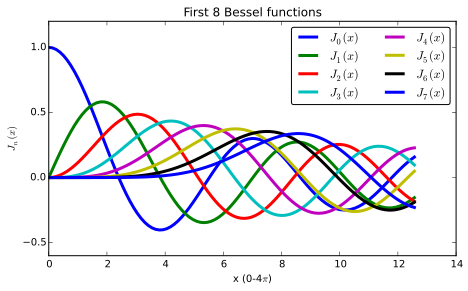

In [14]:
from scipy.special import jn

ORDERMAX = 8

x=np.linspace(0, 4*np.pi, 100)
for order in range(ORDERMAX):
    plt.plot(x, jn(order, x), lw=3) 
    
plt.legend(
    [(r'$J_%s(x)$' % i) for i in range(ORDERMAX)], 
    ncol=2
    ) 
plt.title(r'First %s Bessel functions' % ORDERMAX)
plt.xlabel('x (0-4$\pi$)')
plt.ylabel('$J_n(x)$');

I wonder what the area under the curve is for each of these functions, $J_n(x)$?

In [15]:
from scipy.integrate import simps #Simpsons Rule

for order in range(ORDERMAX):
    fx = jn(order, x)
    area = simps(fx, x) 
    print 'Order: %s\t Area: %.2f' % (order, area)

Order: 0	 Area: 0.83
Order: 1	 Area: 0.84
Order: 2	 Area: 1.14
Order: 3	 Area: 1.21
Order: 4	 Area: 0.95
Order: 5	 Area: 0.75
Order: 6	 Area: 0.85
Order: 7	 Area: 1.13


### Pandas for Tabular Data.  R who?

If your have labeled arrays, you probably want to be using pandas.  The `DataFrame` is an extended numpy array!

In [16]:
import string

CHARS = 26

letters = list(string.uppercase[:CHARS]) #A-Z list
letters[0:5]

['A', 'B', 'C', 'D', 'E']

Generate some random 2d data of dimension 26 x 26

(26, 26)


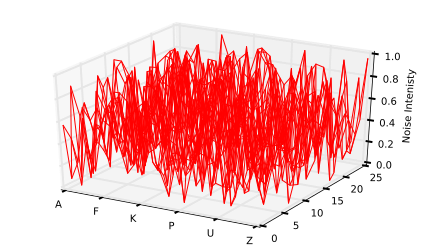

In [17]:
x = range(0,CHARS)

xx, yy = np.meshgrid(x,x)
noise = np.random.random(
                 (CHARS,CHARS) 
                            )

fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_wireframe(xx, yy, noise, color='r', linewidth=1);

ax.set_xticklabels(letters[::5])
ax.set_zlabel('Noise Intenisty')
print noise.shape

There is no real coherence between these names and values as labels.  Thus, it's hard to answer these questions:

   - At which coordinates is the noise maximum (ie A5 vs. G23)?
   - What is the covariance between A1 and D5?
   - How do I drop data for arrays A, B, C and F-G?
   
The pandas dataframe is great for this!

#### The DataFrame and basic stats

In [18]:
from pandas import DataFrame

df = DataFrame(noise, columns=letters)
df

A         B         C         D         E         F         G  \
0   0.571948  0.460348  0.043198  0.449127  0.201084  0.582580  0.264057   
1   0.057740  0.223789  0.632953  0.143919  0.894247  0.745671  0.735482   
2   0.877432  0.620955  0.071026  0.575844  0.472619  0.765582  0.427290   
3   0.030918  0.721746  0.486966  0.528419  0.712295  0.324564  0.608259   
4   0.648195  0.543109  0.666862  0.254455  0.764425  0.795037  0.468420   
5   0.158006  0.308378  0.537714  0.492860  0.343676  0.401723  0.959794   
6   0.293738  0.902832  0.596713  0.579569  0.204195  0.949397  0.671480   
7   0.262241  0.780530  0.336295  0.713928  0.274949  0.737194  0.047315   
8   0.170064  0.849682  0.377161  0.256023  0.079520  0.473504  0.725610   
9   0.056905  0.602777  0.621705  0.048731  0.955102  0.071260  0.977742   
10  0.513614  0.905255  0.770145  0.894239  0.041097  0.909291  0.243786   
11  0.943234  0.941659  0.819251  0.322901  0.308520  0.897030  0.268530   
12  0.403274  0.764429  0.187118  0.311865  0.409910  0.680470  0.184713   
13  0.363684  0.071748  0.055076  0.741481  0.683989  0.565774  0.352641   
14  0.159382  0.038324  0.668397  0.679039  0.901596  0.974337  0.952710   
15  0.277588  0.086003  0.441157  0.621277  0.075697  0.998742  0.661134   
16  0.670720  0.338054  0.361941  0.695123  0.565002  0.998176  0.588983   
17  0.366642  0.348222  0.659392  0.730537  0.833248  0.456151  0.909161   
18  0.167212  0.997043  0.035602  0.326237  0.399633  0.813538  0.126501   
19  0.607861  0.317667  0.125976  0.322285  0.780569  0.535400  0.174033   
20  0.184771  0.277291  0.482740  0.888664  0.270422  0.161007  0.668232   
21  0.054437  0.769849  0.888241  0.709113  0.805224  0.944821  0.663279   
22  0.011866  0.118386  0.646740  0.858244  0.758344  0.110855  0.761714   
23  0.136579  0.068441  0.105619  0.330553  0.909322  0.411008  0.437475   
24  0.431330  0.022314  0.462522  0.642616  0.292789  0.292250  0.024029   
25  0.128212  0.710471  0.060686  0.236516  0.169982  0.243014  0.982204   

           H         I         J    ...            Q         R         S  \
0   0.938240  0.389333  0.866125    ...     0.605394  0.433205  0.823030   
1   0.914039  0.845637  0.230262    ...     0.355414  0.659698  0.408834   
2   0.174567  0.274990  0.747809    ...     0.555161  0.241812  0.712335   
3   0.675319  0.758769  0.822572    ...     0.640302  0.905280  0.706910   
4   0.286206  0.472847  0.436848    ...     0.534098  0.594773  0.815130   
5   0.094203  0.312498  0.367770    ...     0.447239  0.660200  0.460028   
6   0.203428  0.612263  0.920452    ...     0.989809  0.585941  0.621003   
7   0.533890  0.517321  0.722870    ...     0.422656  0.018261  0.570779   
8   0.280771  0.370464  0.626564    ...     0.029728  0.038252  0.791596   
9   0.983366  0.068076  0.558793    ...     0.159891  0.174194  0.681417   
10  0.841954  0.800017  0.921512    ...     0.719807  0.818773  0.167449   
11  0.947114  0.637368  0.082189    ...     0.778678  0.599521  0.973372   
12  0.862902  0.404343  0.887347    ...     0.820975  0.607395  0.722095   
13  0.309447  0.041904  0.336165    ...     0.746590  0.474066  0.343561   
14  0.751777  0.592430  0.143180    ...     0.875506  0.271319  0.040987   
15  0.986753  0.453984  0.501324    ...     0.065318  0.478603  0.137305   
16  0.889687  0.492356  0.373986    ...     0.529029  0.597409  0.929729   
17  0.668200  0.484151  0.018272    ...     0.221284  0.622606  0.207423   
18  0.009000  0.427701  0.758961    ...     0.637105  0.918864  0.222937   
19  0.841937  0.470257  0.681031    ...     0.508315  0.657917  0.105884   
20  0.213182  0.428900  0.254121    ...     0.635999  0.391390  0.125313   
21  0.831877  0.635500  0.896530    ...     0.765465  0.276122  0.537965   
22  0.587899  0.290779  0.020950    ...     0.686106  0.778503  0.447595   
23  0.802953  0.399122  0.202743    ...     0.072380  0.691366  0.996504   
24  0.475676  0.697309  0.813528    ...     0.469289  0.81

In [19]:
print df.max()

A    0.943234
B    0.997043
C    0.888241
D    0.894239
E    0.955102
F    0.998742
G    0.982204
H    0.986753
I    0.845637
J    0.921512
K    0.979202
L    0.990971
M    0.988213
N    0.991014
O    0.940841
P    0.936433
Q    0.989809
R    0.918864
S    0.996504
T    0.972937
U    0.914602
V    0.958864
W    0.960074
X    0.963031
Y    0.906973
Z    0.993190
dtype: float64


Indexing and stats are really intuitive in pandas.  

In [20]:
df['A'].std()

0.26188217901968441

In [21]:
df.loc[:, 'A':'F'].std()

A    0.261882
B    0.322852
C    0.268183
D    0.239048
E    0.301542
F    0.294269
dtype: float64

How bout the covariance matrix?  This will tell us how correlated the times are.  For example, how correlated is A1 with B9?  Because the data is random, **they should not be correlated!**, except along the diagonal which is the correlation of a point with itself!

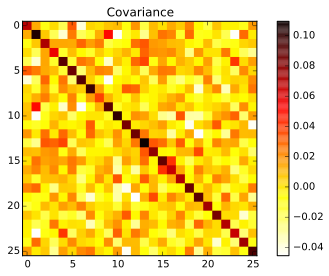

In [22]:
imshow(df.cov(),
           cmap='hot_r',
          interpolation='nearest' #No smoothing
          )

plt.title('Covariance')
plt.colorbar()
df.cov().iloc[0:5, 0:5];

#### Scatter plots/Interactive MPLD3

Let's plot a scatter plot of the average values of the data.  But let's size the points relative to the stnd deviation of the columns!

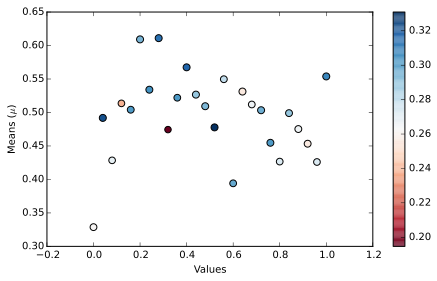

In [23]:
means = df.mean()
std = df.std()
maxes = df.max()

x = np.linspace(0,1,len(means))

scatter = plt.scatter(x, means, c=std, s=maxes*50, cmap='RdBu')
plt.ylabel('Means ($\mu$)')
plt.xlabel('Values')
plt.colorbar()
fig, ax = plt.gcf(), plt.gca(); #Store figure for next cell

We can use the new [mpld3 wrapper](https://github.com/jakevdp/mpld3) or the cool startup [plotly](https://plot.ly/?gclid=CjwKEAiAv7ajBRCIldS7rp7wzFkSJAAA1n4D97gzdGbxTwOQL63uSeLWnFbjx0FnQqZQfRXQnBMm_xoCfE7w_wcB), to get some **interactive action** going.  

**(Dependencies required to run this portion of notebook.)**

In [24]:
import mpld3

points = zip(means, std, maxes)

tooltip = mpld3.plugins.PointLabelTooltip(scatter, 
           labels=['mean:%.2f, sig:%.2f, max:%.2f' % p for p in points])

ax.set_title('NOW INTERACTIVE!')
mpld3.plugins.connect(fig, tooltip)
mpld3.display_d3(fig)

/home/glue/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/mpld3-0.3git-py2.7.egg/mpld3/utils.py:50: DeprecationWarning: mpld3.display_d3 is deprecated and will be removed.  Use mpld3.display instead
  category=DeprecationWarning)


This is a testament to the ability of the rich display system of the notebook.  Since it runs in the browser, it can do kewl stuff!

#### Boolean indexing and handling missing data is also a very easy in numpy/pandas

A      B      C      D      E
0   True  False  False  False  False
1  False  False   True  False   True
2   True   True  False   True  False
3  False   True  False   True   True
4   True   True   True  False   True

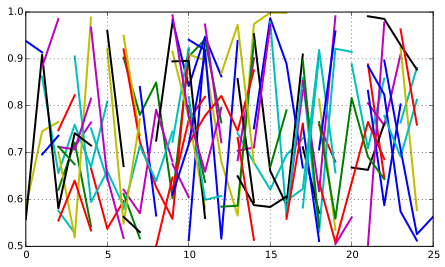

In [25]:
masks = df > 0.5
df[masks].plot(legend=False)
masks.iloc[0:5, 0:5]

#### What kind of secret array is this?

In [27]:
from secretdata import secret, appropriate_response

print secret.shape, type(secret), '\n\n', secret

(512, 512, 3) <type 'numpy.ndarray'> 

[[[136 152 139]
  [137 151 138]
  [135 148 138]
  ..., 
  [ 80  99 103]
  [ 84 103 107]
  [ 89 108 112]]

 [[135 151 138]
  [138 152 139]
  [139 152 142]
  ..., 
  [ 80  99 103]
  [ 83 102 106]
  [ 86 105 109]]

 [[136 152 139]
  [138 154 141]
  [143 156 146]
  ..., 
  [ 81 100 104]
  [ 82 101 105]
  [ 83 102 106]]

 ..., 
 [[204 219 200]
  [199 214 195]
  [199 214 195]
  ..., 
  [155 162 144]
  [155 162 144]
  [156 163 145]]

 [[204 219 200]
  [199 214 195]
  [199 214 195]
  ..., 
  [155 162 144]
  [155 162 144]
  [156 163 145]]

 [[204 219 200]
  [199 214 195]
  [199 214 195]
  ..., 
  [155 162 144]
  [155 162 144]
  [156 163 145]]]


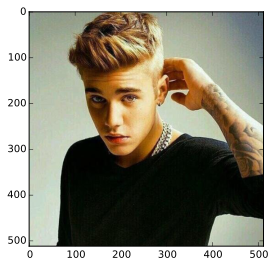

In [28]:
imshow(secret);

Oh numpy, how you forsake thee

In [29]:
appropriate_response

By the way, `Imshow()` is a matplotlib image plotting function; implicitly imported when we called pylab/NBCONFIG at the top of the program!

### Scikit Image and Numpy

**Images are numpy arrays so all numpy array operations like arithmetic, slicing and masking all work by default!**  Let's use some scikitimage sample data to show this.

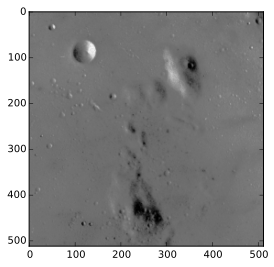

In [30]:
from skimage.data import moon

datmoon = moon()
imshow(datmoon, cmap='gray');

MEAN BRIGHTNESS: 112.169570923


array([[ True,  True,  True, ..., False, False, False],
       [ True,  True,  True, ..., False, False, False],
       [ True,  True,  True, ..., False, False, False],
       ..., 
       [False, False, False, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True]], dtype=bool)

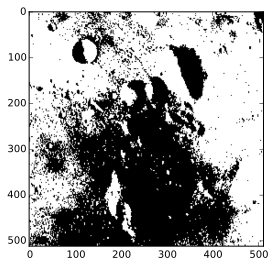

In [31]:
# MASKING

mean_brightness = np.mean(datmoon)
print 'MEAN BRIGHTNESS: %s' % mean_brightness

mask = datmoon > mean_brightness
imshow(mask, cmap='gray')
mask

Let's merge beebs and the moon by converting beebs down to 1-channel

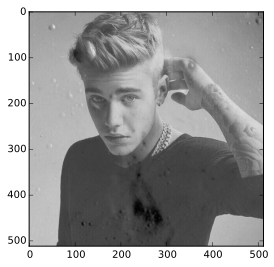

In [32]:
from skimage.color import rgb2gray

beebsgray = rgb2gray(secret)*255 #Scale factor
imshow(beebsgray + datmoon, cmap='gray');

#### Scikit Image Image Processing Algorithms

Scikit image also has tons of image processing tools (duh)!  Consider the Sobel operator that computes the gradient of the image.  Let's do this on the moon:

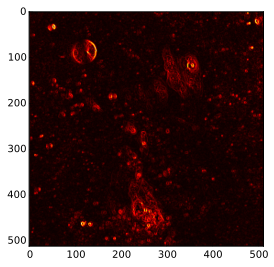

In [33]:
from skimage.filter import sobel

imshow( sobel(datmoon), cmap='hot' ); #Artificial color

I'll go ahead and combine the sobel edges back with the original images to sharpen it.  The sobel values are pretty small, so let me enhance them by a **FACTOR**

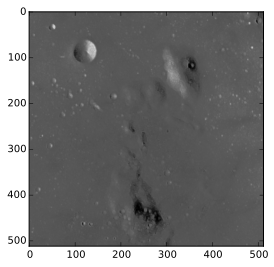

In [34]:
FACTOR = 250

enhanced = sobel(datmoon)*FACTOR + datmoon
imshow(enhanced, cmap='gray');

Another kewl image processing concept is entropy [(see additional example)](http://scikit-image.org/docs/dev/auto_examples/plot_entropy.html)

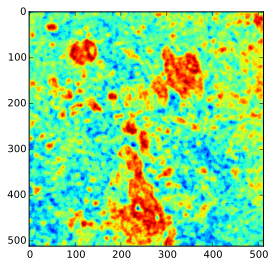

In [47]:
from skimage.filter.rank import entropy
from skimage.morphology import disk

imshow(entropy(datmoon, disk(5) ), cmap='jet');

### Let's learn something: Scikit Learn

I will borrow a [cool example from sklearn](http://scikit-learn.org/stable/auto_examples/neighbors/plot_species_kde.html), written by Jake Vanderplas (also the author of MPLD3).  Based on the original wok, [Maximum Entropy Modeling of Species Geographic Distributions (2006)](http://www.cs.princeton.edu/~schapire/papers/ecolmod.pdf).  I cut a few lines out of the example, so please refer to the original linked example.

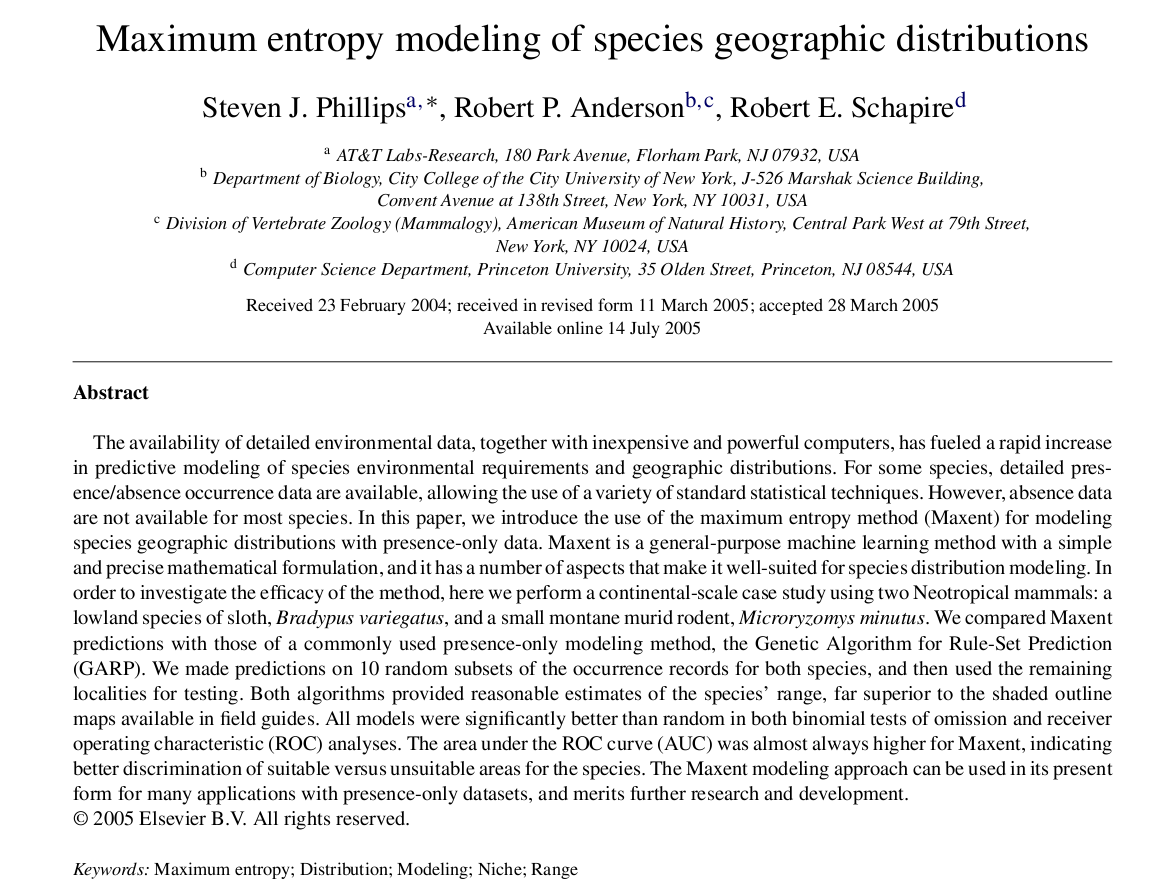

In [36]:
Image('images/abstract.png', width=800)

**Some key ideas of the paper**:
    
    "We are interested in devising a model of a species’
    environmental requirements from a set of occurrence
    localities [long/lattitude], together with a set of environmental vari-
    ables that describe some of the factors that likely
    influence the suitability of the environment for the
    species..."

And

    "Modeling techniques that require only presence data are therefore
    extremely valuable..."
    
Turns out that

    "[Maxentropy] is a general-purpose method for making
    predictions or inferences from incomplete information.
    Its origins lie in statistical mechanics (Jaynes, 1957)"

Look at sloth and rodent

    "The brown-throated three-toed sloth Bradypus var-
    iegatus (Xenarthra: Bradypodidae) is a large arbo-
    real mammal (3–6 kg) that is widely distributed in the
    Neotropics from Honduras to northern Argentina." 

Some environmental variables for the model:

    "The environmental variables fall into three categories: climate, elevation
    and potential vegetation. All variables are recorded at
    a pixel size of 0.05◦ by 0.05◦ , yielding a 1212 × 1592
    grid, with 648,658 pixels containing data for all vari-
    ables."

What they predicted:

    Where the species are likely to be found, given what we know of 
    where they are already and what environmental factors are there.

**Here are the actual locations of the sloth, rodent**

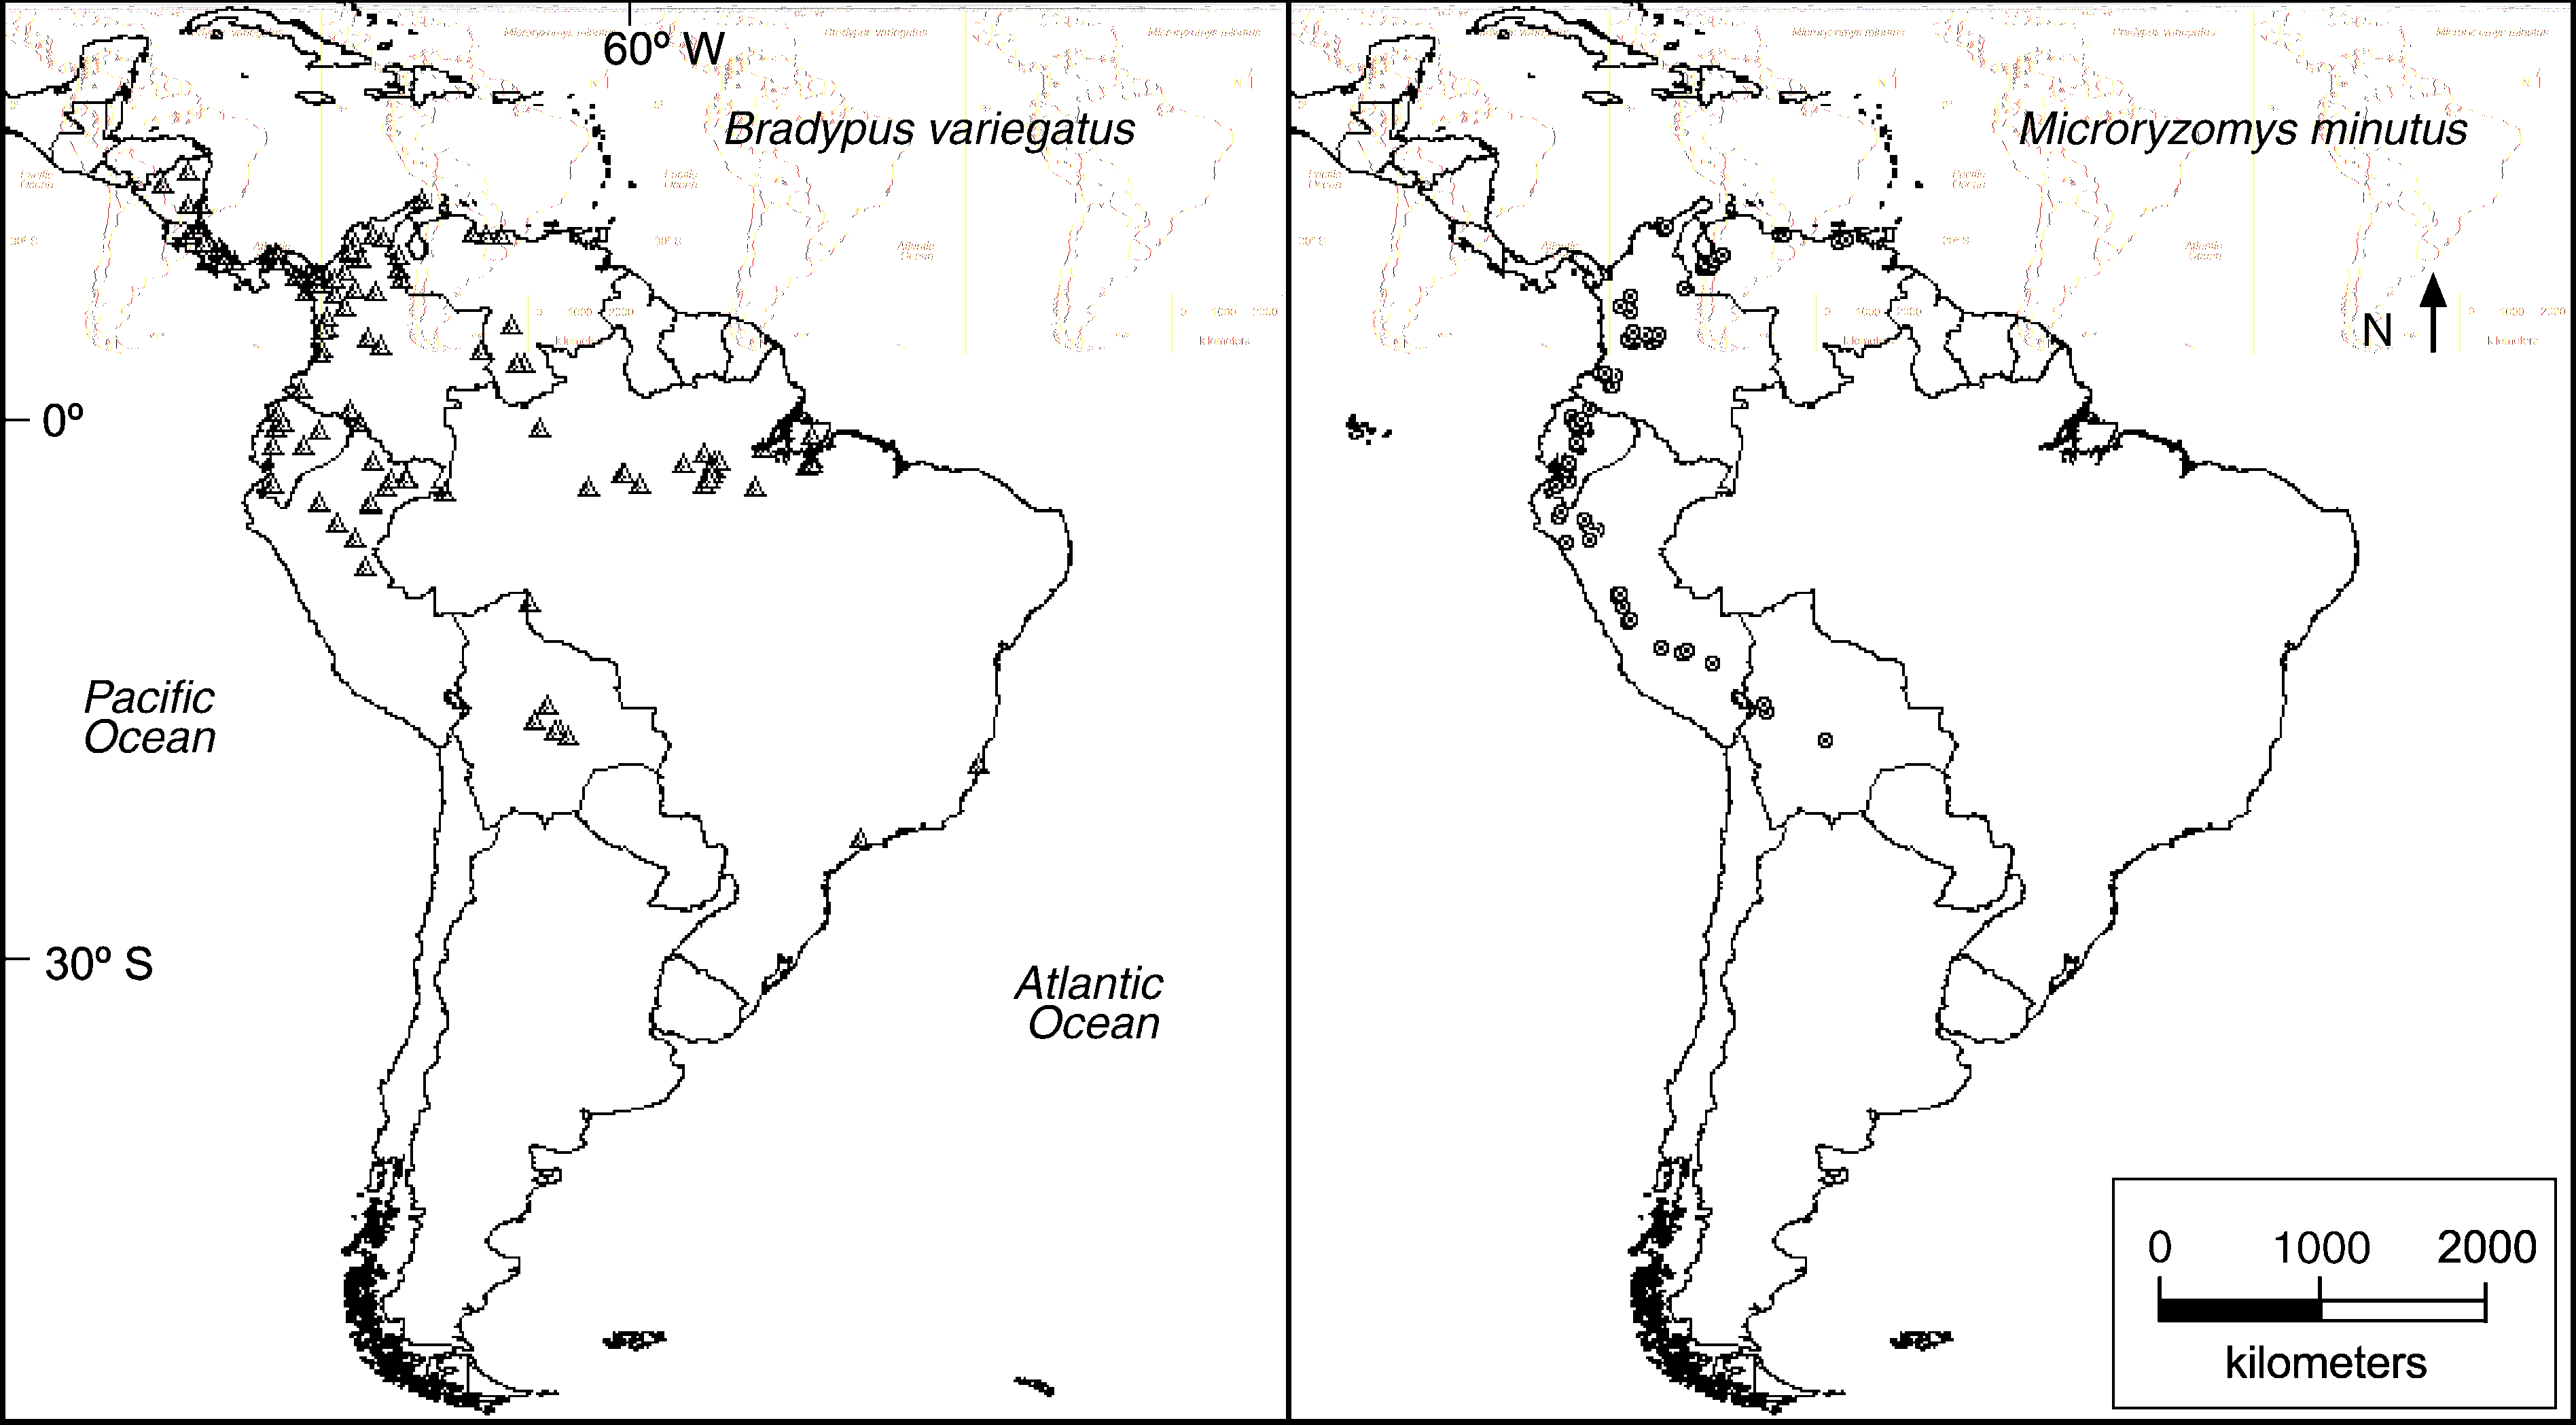

In [37]:
Image('images/actual_regions.png', width=700, height=500)

**Here are the predictions**

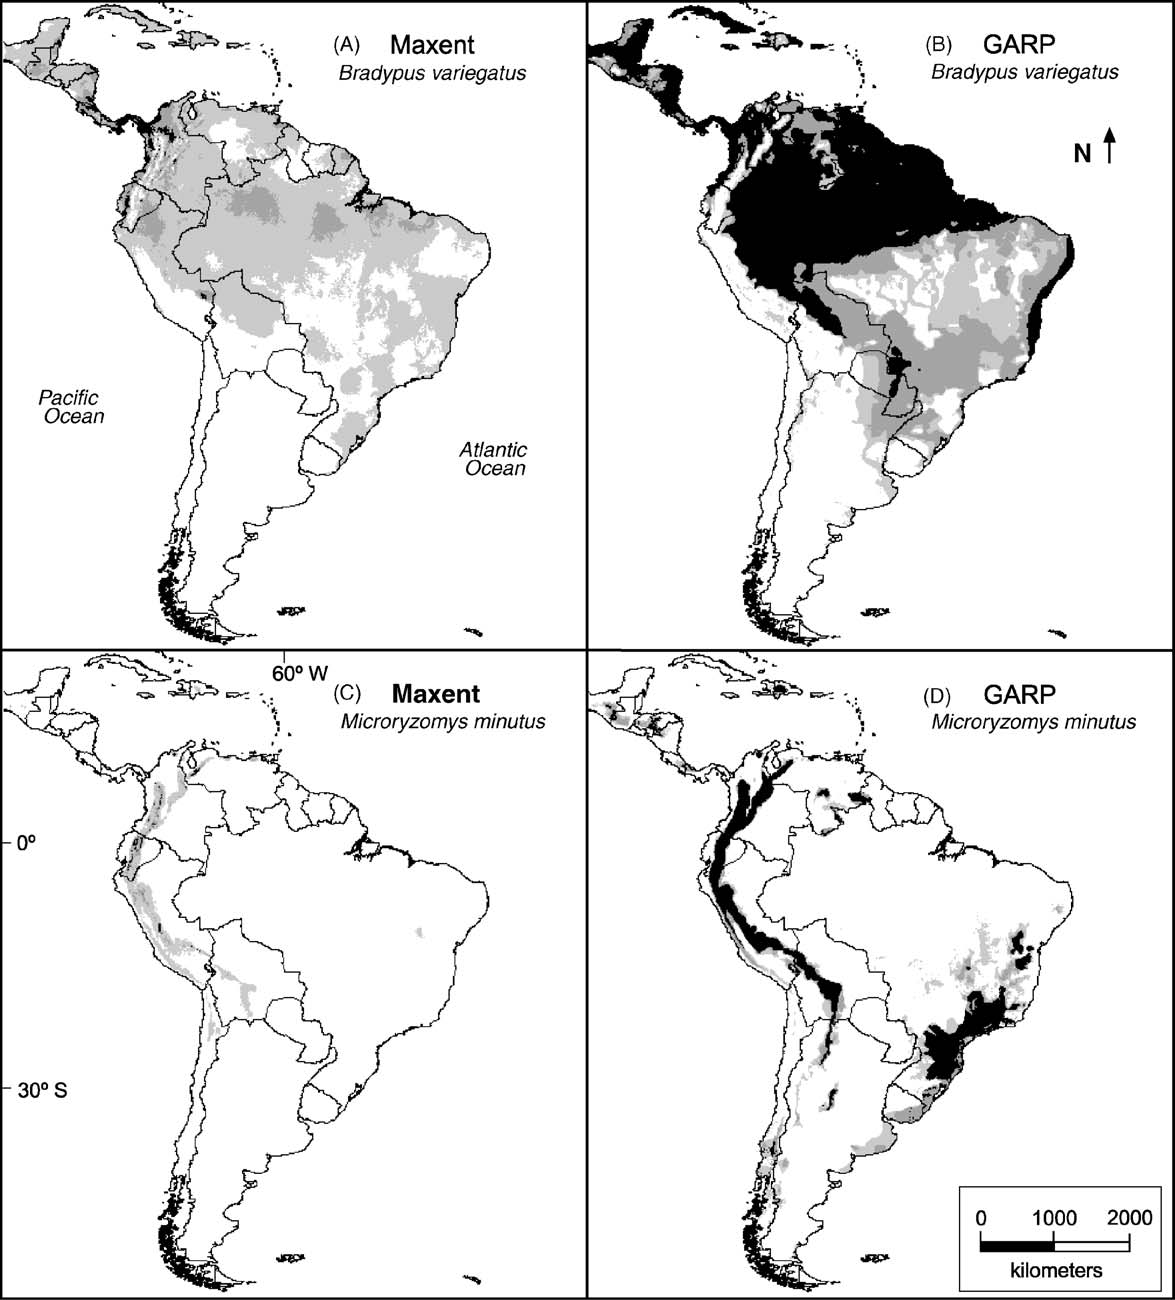

In [38]:
Image('images/predictions.png', height=1000, width=700)

 - computing KDE in spherical coordinates
Fitting with data 0
 - plot coastlines using basemap
Fitting with data 1
 - plot coastlines using basemap


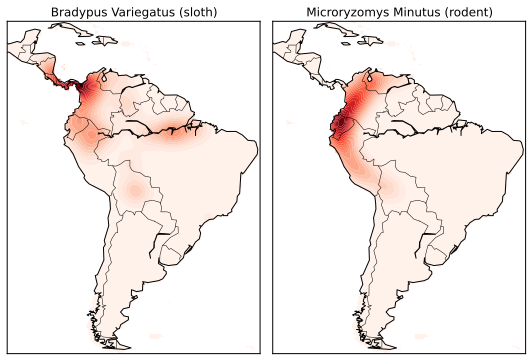

In [39]:
# Author: Jake Vanderplas <jakevdp@cs.washington.edu>
#
# License: BSD 3 clause

from sklearn.datasets import fetch_species_distributions
from sklearn.datasets.species_distributions import construct_grids
from sklearn.neighbors import KernelDensity

# Need Basemap
from mpl_toolkits.basemap import Basemap

# Get matrices/arrays of species IDs and locations
data = fetch_species_distributions()
species_names = ['Bradypus Variegatus (sloth)', 'Microryzomys Minutus (rodent)']

#Lattitude/Longitude stuff
Xtrain = np.vstack([data['train']['dd lat'],
                    data['train']['dd long']]).T

# Array that stores species data
ytrain = np.array([d.decode('ascii').startswith('micro')
                  for d in data['train']['species']], dtype='int')

 # Convert lat/long to radians
Xtrain *= np.pi / 180. 

# Set up the data grid for the contour plot
xgrid, ygrid = construct_grids(data)
X, Y = np.meshgrid(xgrid[::5], ygrid[::5][::-1])
land_reference = data.coverages[6][::5, ::5]

# -9999 is ocean; mask only areas corresponding to land in the map
land_mask = (land_reference > -9999).ravel()
xy = np.vstack([Y.ravel(), X.ravel()]).T
xy = xy[land_mask]
xy *= np.pi / 180.

# Set up 2 adjacent, empty plots
fig = plt.figure(figsize=(8,8))
fig.subplots_adjust(left=0.05, right=0.95, wspace=0.05)

# construct a kernel density estimate of the distribution
print(" - computing KDE in spherical coordinates")
kde = KernelDensity(bandwidth=0.04, 
                        metric='haversine',
                        kernel='gaussian',
                        algorithm='ball_tree')

for i in range(2):
    plt.subplot(1, 2, i + 1)

    # Actually fits the data
    print 'Fitting with data %s' % i
    kde.fit(Xtrain[ytrain == i])

    # evaluate only on the land: -9999 indicates ocean
    Z = -9999 + np.zeros(land_mask.shape[0])
    
    # Bam, score samples: this is where prediction is being done
    Z[land_mask] = np.exp(kde.score_samples(xy)) 
    Z = Z.reshape(X.shape)

    # plot contours of the density
    levels = np.linspace(0, Z.max(), 25)
    plt.contourf(X, Y, Z, levels=levels, cmap=plt.cm.Reds)

    print(" - plot coastlines using basemap")
    map_murica = Basemap(projection='cyl', #type of colormap
                         llcrnrlat=Y.min(),
                         urcrnrlat=Y.max(),
                         llcrnrlon=X.min(),
                         urcrnrlon=X.max(),
                         resolution='c')

    map_murica.drawcoastlines()
    map_murica.drawcountries()

    plt.title(species_names[i])

plt.show()

If someone with domain knowledge could elabore on how the KDE of these settings is equivalent to maximum entropy (or is Jake not using max entropy per-se?), I'd appreciate that big time.

# THE END

<hr>
<br>


<div style="float:left; \">
    <img src="https://avatars0.githubusercontent.com/u/1972276?s=460" 
 align=left; text-align:center; style="float:left; margin-left: 5px; margin-top: -25px; width:150px; height:150px" /> 
</div>

<div style="float:left; \"><a href="https://github.com/hugadams">
    <img src="https://assets-cdn.github.com/images/modules/logos_page/GitHub-Mark.png" 
 align=left; text-align:center; style="float:left; margin-left: 25px; margin-top: -25px; width:75px; height:75px" /> 
</div>


<div style="float:left; \"><a href="https://twitter.com/hughesadam87">
    <img src="http://paymentmagnates.com/wp-content/uploads/2014/04/twitter-icon.png" 
 align=left; text-align:center; style="float:left; margin-left: 25px; margin-top: -25px; width:75px; height:75px" /> 
</div>

<div style="float:left; \"><a href="https://www.researchgate.net/profile/Adam_Hughes2?ev=hdr_xprf">
    <img src="http://www.txhughes.com/images/button-researchgate.png" 
 align=left; text-align:center; style="float:left; margin-left: -175px; margin-top: 55px; width:75px; height:75px" /> 
</div>

<div style="float:left; \"><a href="https://www.linkedin.com/profile/view?id=121484744&trk=nav_responsive_tab_profile_picg">
    <img src="http://smallbusinessesdoitbetter.com/wordpress/wp-content/uploads/li.png" 
 align=left; text-align:center; style="float:left; margin-left: -75px; margin-top: 55px; width:75px; height:75px" /> 
</div>

<div style="float:center; \"><a href="http://www.gwu.edu/">
    <img src="https://raw.githubusercontent.com/hugadams/pyparty/master/pyparty/data/gwu.png" 
 align=center style="float:center; margin-right: 30px; margin-top: -35px; width:335px; height:180px" />
</div>


<h4 style="margin-top:0px;"> This notebook is free for redistribution. If citing, please reference as: </h4>
- *Hughes, A. (2012). [A Computational Framework for Plasmonic Nanobiosensing](https://www.researchgate.net/publication/236672995_A_Computational_Framework_for_Plasmonic_Nanobiosensing).  Python in Science Conference [SCIPY].* 


<h3 style="margin-top:30px;"> Questions or Feedback? </h3>

* pyuvvis@groups.google.com
* hugadams@gwmail.gwu.edu 
* twitter:  <a href="https://twitter.com/hughesadam87" target="_blank">@hughesadam87</a>
* <a href="http://www.gwu.edu/~condmat/CME/reeves.html" target="_blank">Mark Reeves Biophysics Group</a>




<h3 style="margin-top:30px;"> References: </h3>

* [1] : **REF 1**
* [2] : **REF 2**





<h3 style="margin-top:30px;"> Related: </h3>

   * <a href="https://github.com/hugadams/pyparty" target="_blank">pyuvvis: Exploratory Spectral Data Analysis</a>
   * <a href="https://github.com/hugadams/pyparty" target="_blank">pyparty: Image Analysis of Particles</a>
   * <a href="http://lorenabarba.com/" target="_blank">Lorena A. Barba (GWU Engineering)</a>
   * <a href="http://www.youtube.com/watch?v=W7RgkHM-B60" target="_blank">xray: extended arrays for scientific datasets</a>



<h3 style="margin-top:30px;">Notebook styling ideas:</h3>

* <a href="http://blog.louic.nl/?p=683" target="_blank">Louic's web blog</a>
* <a href="https://plot.ly/feed" target="_blank">Plotly</a>
* <a href="http://damon-is-a-geek.com/publication-ready-the-first-time-beautiful-reproducible-plots-with-matplotlib.html" target="_blank">Publication-ready the first time: Beautiful, reproducible plots with Matplotlib</a>

<br>
<hr>